# Tarea Grande 1

##### Nombre: Francisco Hortal

## Importación de librerías

En la siguiente celda, se importarán las librerías que serán utilizadas para esta parte de la tarea. Si deseas utilizar una librería adicional y que no sea *built-in*, repórtala en el ```README.md``` de tu repositorio. Solo así podremos saber que necesitamos instalar algo más para ejecutar tu tarea y evaluarla.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


## Cargar datos

In [9]:
data_1 = '../dataset/dataset_final.csv'
data_2 = '../dataset/artists_genres_images.csv'

#Saque informacion de https://www.youtube.com/watch?v=JJ7BMoQotEY
#saque informacion de https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673

tabla_1 = pd.read_csv(data_1)
df_1 = pd.DataFrame(tabla_1)
tabla_2 = pd.read_csv(data_2)
df_2 = pd.DataFrame(tabla_2)

## Convertir fechas

In [10]:
#Saque info de https://towardsdatascience.com/basic-time-series-manipulation-with-pandas-4432afee64ea

tabla_1['Date'] = pd.to_datetime(tabla_1['Date'], unit = 's')

## Gráfico de barras de las 10 canciones más escuchadas

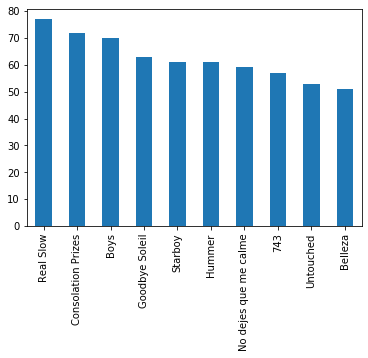

In [11]:
#Info: https://towardsdatascience.com/10-python-pandas-tricks-that-make-your-work-more-efficient-2e8e483808ba
#Info: https://www.geeksforgeeks.org/python-pandas-dataframe-nlargest/
#Info: https://www.youtube.com/watch?v=AFnUhiRXXWk
veces_canciones = df_1['Track'].value_counts()
top_10 = veces_canciones.nlargest(10)
top_10.plot.bar()

## Generar ```DataFrame``` con la información pedida sobre los 5 artistas más escuchados

In [12]:
veces_artistas = df_1['Artist'].value_counts()
top_5 = veces_artistas.head(5)
print(top_5)
list_1 = []
for df_artistas in df_2['Artist']:
    list_1.append(df_2['Image_Link'])
df_artistas = pd.DataFrame([top_5, list_1], columns = ['Artist', 'Images'])
print(df_artistas)


Phoenix           523
Miranda!          511
Javiera Mena      400
Alex Anwandter    343
Lily Allen        303
Name: Artist, dtype: int64


AttributeError: 'builtin_function_or_method' object has no attribute 'get_indexer'

## Gráfico de torta de los géneros más escuchados

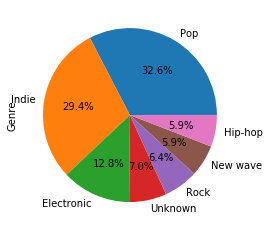

In [14]:
veces_genero = df_2['Genre'].value_counts()
top_10g = veces_genero.nlargest(7)
top_10g.plot.pie(autopct = '%1.1f%%')

## Gráfico de la evolución de la cantidad de canciones escuchadas por mes. [Ejemplo](https://screenshotscdn.firefoxusercontent.com/images/652c3d16-ecd6-4aa7-bdce-4f9b1b21dfc9.png)

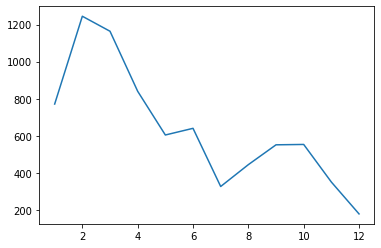

In [15]:
#Info: https://www.youtube.com/watch?v=yCgJGsg0Xa4&t=317s
#Info: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
veces_mes = df_1.Date.dt.month.value_counts()
veces_mes = veces_mes.sort_index()
plt.plot(veces_mes)

## Gráfico de la cantidad de canciones escuchadas por día de la semana

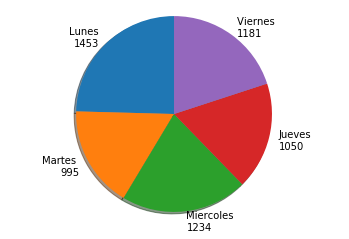

In [16]:
#Info: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

veces_semana = df_1.Date.dt.weekday.value_counts()
veces_semana = veces_semana.sort_index()
dias = ['Lunes'+"\n"+str(veces_semana[0]), 'Martes \n' + str(veces_semana[1]), 'Miercoles \n'+str(veces_semana[2]),
        'Jueves \n'+str(veces_semana[3]), 'Viernes \n' + str(veces_semana[4])]
cantidad = [veces_semana[0],veces_semana[1],veces_semana[2],veces_semana[3],veces_semana[4]]

fig1, ax1 = plt.subplots()
ax1.pie(cantidad, labels=dias,
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()




## Gráfico de barras de la cantidad de canciones escuchadas por hora del día. [Ejemplo](https://screenshotscdn.firefoxusercontent.com/images/94ed603f-1a96-483e-b304-32a71d5a73d5.png)

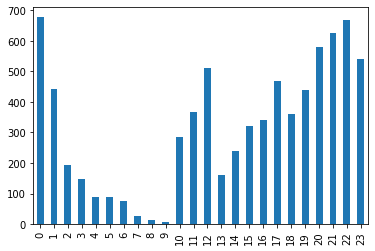

In [17]:
veces_hora = df_1.Date.dt.hour.value_counts()
veces_hora = veces_hora.sort_index()
veces_hora.plot.bar()